## Detecting Twitter Bots

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings
%matplotlib inline

In [6]:
training_data = pd.read_csv('/Users/Envy1/Desktop/Kaggle.csv')
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]
training_data.shape

(2797, 20)

In [7]:
########################Printing Bots (Top 10 records)
bots.head(10)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r\n ""created_at"": ""Sun Mar 12 15:44:04 ...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,False,lucarivera16,1
5,8.410000e+17,8.41E+17,dantheimprover,"Austin, TX",Just a guy trying to do good by telling everyo...,NaN,1,186,0,13/03/2017 22:53,0,False,11,en,Status(_api=<tweepy.api.API object at 0x101927...,True,False,True,dantheimprover,1
6,2.482835e+09,2482834658,_all_of_us_,in a machine.,bot by @rubicon,NaN,193,0,19,Wed May 07 22:29:25 +0000 2014,0,False,6068,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,everything always,1
7,3.333574e+09,3333573622,KatamariItems,NaN,[Bot rolled up by @BeachEpisode] Cataloguing e...,NaN,8227,2,89,Thu Jun 18 22:07:31 +0000 2015,26,False,2597,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,Katamari Collection,1
8,2.996105e+09,2996105102,AutophagyPapers,NaN,Twitterbot for #Autophagy papers. Curated by @...,NaN,275,0,17,1/25/2015 17:34,23,False,9922,en,Feeding Schedule And Proteolysis Regulate Auto...,False,False,False,Autophagy Papers,1
9,3.271096e+09,3271095818,HSC_papers,NaN,NaN,NaN,51,3,9,7/7/2015 15:23,0,False,2515,en,Functional Selectivity in Cytokine Signaling R...,True,False,False,Hematopoiesis,1


In [8]:
########################Printing Non Bots records (Top 10 records)
nonbots.head(10)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
1321,3.471604e+07,34716038,aaroncarter,Sony Recording Artist,NEW AARON CARTER MUSIC DOWNLOAD LINK LÌüVÌÇ EP...,NaN,571310,76070,4909,Thu Apr 23 20:15:49 +0000 2009,37437,True,56077,en,"{u'contributors': None, u'truncated': False, u...",False,False,True,Aaron Carter,0
1322,3.013511e+06,3013511,michellebranch,NaN,"singer/songwriter, hopeless romantic, drinker ...",https://t.co/2vSKw7cmzC,292385,963,6076,Fri Mar 30 20:58:59 +0000 2007,1248,True,16688,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Michelle Branch,0
1323,5.623762e+07,56237623,stronginmyfaith,NaN,NaN,NaN,1,7,0,7/13/2009 0:38,0,False,3,en,"Status(contributors=None, truncated=False, tex...",True,True,False,laurie lindeman,0
1324,2.796428e+07,27964284,Jessicaveronica,5th Dimension,"@TheVeronicas ‰Ü Wanderer, worshiper, if you ...",https://t.co/U6yNZoDZfu,222659,352,3261,Tue Mar 31 21:12:33 +0000 2009,143,True,10999,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Jessica Veronica,0
1325,5.528761e+08,552876065,resargento,brasil,meio ogra mas o coraí_í£o í© de mocinha,NaN,646,446,2,4/13/2012 17:37,13440,False,25292,pt,NaN,False,False,False,rebosta,0
1326,3.810743e+09,3810742695,crazyl1f,NaN,NaN,NaN,2,5,0,Tue Sep 29 04:13:42 +0000 2015,0,False,2,zh-cn,"{'truncated': False, 'entities': {'user_mentio...",True,True,False,Songgaoyun Deng,0
1327,1.531344e+09,1531343556,TaniasimonTania,Milano,"Mechanical engineer, F1 fan and traveler _ÙÎ",NaN,27,25,0,6/19/2013 16:46,17,False,50,it,"Status(in_reply_to_user_id=None, lang='en', co...",True,False,False,Tania Simon,0
1328,1.289613e+09,1289612510,YCPRProf,ëÔë£ë_-‰_Ò•ü-Gamma Iota Advisor,"We are the music makers, and we are the dreame...",https://t.co/0qxQVQhyJq,316,192,9,3/22/2013 20:39,2257,False,7329,en,"Status(in_reply_to_user_id=None, lang='en', co...",False,False,True,Dr. K. McBride,0
1329,1.998091e+07,19980906,bandofhorses,NaN,'Why Are You OK' out now - https://t.co/G7QeyE...,https://t.co/KcS6ANtb3a,211616,8617,4071,Tue Feb 03 16:21:39 +0000 2009,1941,True,2037,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Band of Horses,0
1330,3.782236e+08,378223565,sparker,SF / LA / NYC,"Napster, Plaxo, Facebook, Causes, Spotify & Ai...",https://t.co/OChMaSsvLB,429604,600,4999,Thu Sep 22 21:06:05 +0000 2011,30,True,497,en,{'created_at': 'Wed Feb 01 21:59:23 +0000 2017...,False,False,False,Sean Parker,0


### Exploratory Data Analysis

#### Identifying Missingness in the data

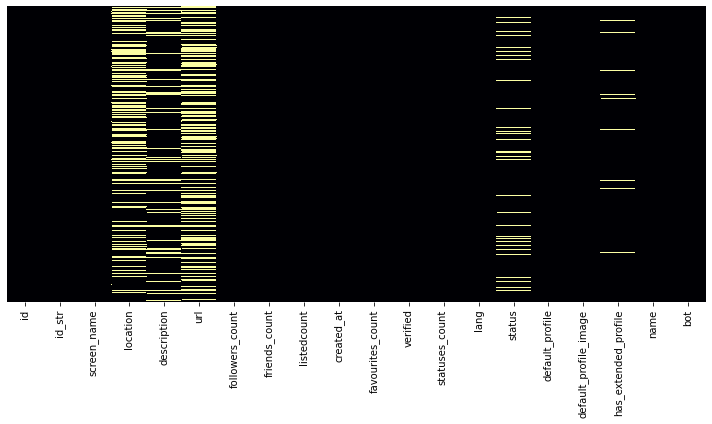

In [9]:
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='inferno')
    plt.tight_layout()
    return plt.show()

get_heatmap(training_data)

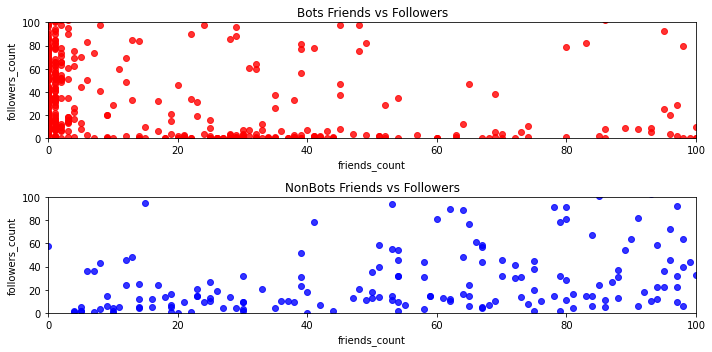

In [10]:
bots.friends_count/bots.followers_count
############printout bots frineds vs followers of that bot
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(bots.friends_count, bots.followers_count, color='red', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

############printout Nonbots frineds vs followers of that user
plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(nonbots.friends_count, nonbots.followers_count, color='blue', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

#### Identifying Imbalance in the data

In [11]:
###########identifying data for bots which has less friends and more followers
bots['friends_by_followers'] = bots.friends_count/bots.followers_count
bots[bots.friends_by_followers<1].shape



(812, 21)

In [12]:
###########identifying data for Non bots which has less friends and more followers
nonbots['friends_by_followers'] = nonbots.friends_count/nonbots.followers_count
nonbots[nonbots.friends_by_followers<1].shape

(952, 21)

(1320, 21)
(1337, 21)


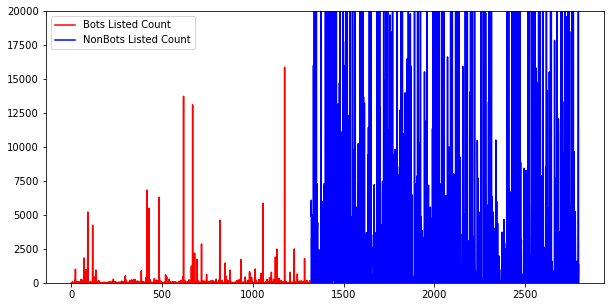

In [14]:
plt.figure(figsize=(10,5))
plt.plot(bots.listedcount, color='red', label='Bots Listed Count')
plt.plot(nonbots.listedcount, color='blue', label='NonBots Listed Count')
plt.legend(loc='upper left')
plt.ylim(0,20000)
print(bots[(bots.listedcount<15000)].shape)
print(nonbots[(nonbots.listedcount<15000)].shape)

In [15]:
#######print out listed count vlaues for bot and non bots in non bots its values are greater than 16000
bots_listed_count_df = bots[bots.listed_count<16000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<16000]
############New dataframe on base of listed count values less than  16000
bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

AttributeError: 'DataFrame' object has no attribute 'listed_count'

(1320, 21)
(1337, 21)


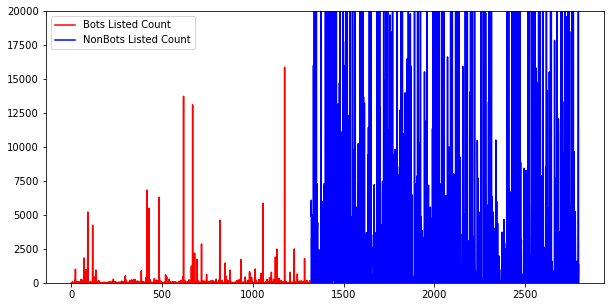

In [16]:
plt.figure(figsize=(10,5))
plt.plot(bots.listedcount, color='red', label='Bots Listed Count')
plt.plot(nonbots.listedcount, color='blue', label='NonBots Listed Count')
plt.legend(loc='upper left')
plt.ylim(0,20000)
print(bots[(bots.listedcount<15000)].shape)
print(nonbots[(nonbots.listedcount<15000)].shape)

In [17]:
#bots[bots.listedcount>10000]
#just a condition if word bot exist in screenname or description for bots
condition = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)

bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
bots['location_binary'] = (bots.location.isnull())
bots['verified_binary'] = (bots.verified==False)
bots.shape

(1321, 24)

In [18]:
#just a condition if word bot exist in screenname or description for non bots
condition = (nonbots.screen_name.str.contains("bot", case=False)==False)| (nonbots.description.str.contains("bot", case=False)==False) |(nonbots.location.isnull()==False)|(nonbots.verified==True)

nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
nonbots['location_binary'] = (nonbots.location.isnull()==False)
nonbots['verified_binary'] = (nonbots.verified==True)

nonbots.shape

(1476, 24)

In [19]:
###########concatenated all data
df = pd.concat([bots, nonbots])
df.shape

(2797, 24)

### Feature Independence using Spearman correlation

In [20]:
#########correlation between features
df.corr(method='spearman')

,id,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary
id,1.000000,-0.672925,-0.402346,-0.615005,-0.439430,-0.611899,-0.451945,0.522990,0.166601,0.652131,0.270435,-0.576100,-0.228328,0.150100
followers_count,-0.672925,1.000000,0.375522,0.896126,0.457363,0.709732,0.649117,-0.496899,-0.293838,-0.468430,-0.577157,0.458213,0.189675,0.130717
friends_count,-0.402346,0.375522,1.000000,0.204403,0.641529,0.356452,0.111118,-0.296358,-0.097607,-0.483105,0.427638,0.342145,0.082692,-0.210592
listedcount,-0.615005,0.896126,0.204403,1.000000,0.349059,0.694340,0.684976,-0.447376,-0.269035,-0.318445,-0.681034,0.338698,0.188797,0.281360
favourites_count,-0.439430,0.457363,0.641529,0.349059,1.000000,0.394227,0.295108,-0.348043,-0.226956,-0.526228,0.104797,0.408864,0.120941,-0.220894
verified,-0.611899,0.709732,0.356452,0.694340,0.394227,1.000000,0.333278,-0.404650,-0.132298,-0.508555,-0.419815,0.434177,0.191922,0.346505
statuses_count,-0.451945,0.649117,0.111118,0.684976,0.295108,0.333278,1.000000,-0.375918,-0.289999,-0.089018,-0.533971,0.162213,0.105333,0.207384
default_profile,0.522990,-0.496899,-0.296358,-0.447376,-0.348043,-0.404650,-0.375918,1.000000,0.246979,0.407748,0.197929,-0.377572,-0.138378,0.072351
default_profile_image,0.166601,-0.293838,-0.097607,-0.269035,-0.226956,-0.132298,-0.289999,0.246979,1.000000,0.139669,0.190986,-0.166388,0.000596,0.033021
bot,0.652131,-0.468430,-0.483105,-0.318445,-0.526228,-0.508555,-0.089018,0.407748,0.139669,1.000000,-0.044056,-0.843429,-0.266342,0.606771


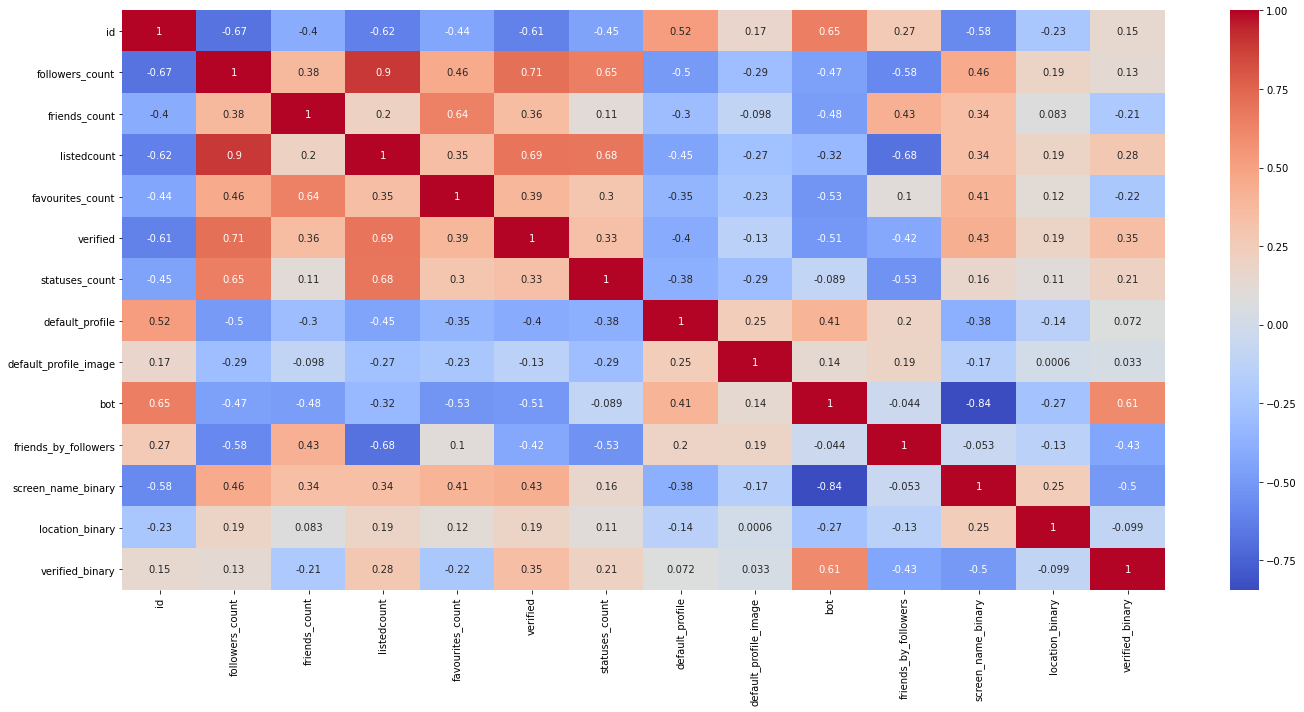

In [21]:
#########heatmap of correlation between features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

Result:
- There is no correlation between **id, statuses_count, default_profile, default_profile_image** and target variable.
- There is strong correlation between **verified, listed_count, friends_count, followers_count** and target variable.
- We cannot perform correlation for categorical attributes. So we will take **screen_name, name, description, status** into feature engineering. While use **verified, listed_count** for feature extraction.

#### Performing Feature Engineering

In [22]:
#filepath = 'https://raw.githubusercontent.com/jubins/ML-TwitterBotDetection/master/FinalCode/kaggle_data/'
################reading data for training
#file= open('training_data_2_csv_UTF.csv', mode='r', encoding='utf-8', errors='ignore')
#training_data = pd.read_csv(file)
training_data = pd.read_csv(r'C:\Users\Ahmed\Downloads\TEST WORK\test_data_final.csv')
########backofwords for bots
bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
###################inside training data columns (screenname, description, name or status) ignoring values for bag of words
training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Ahmed\\Downloads\\TEST WORK\\test_data_final.csv'

#### Performing Feature Extraction

In [18]:
###selecting data which has values less than 20000
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']

## Implementing Different Models

#### Decision Tree Classifier

In [19]:
###########loading libraries sklearn for machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
###########Splitting data between X and Y features
X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]
#############using decision tree classifier here
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)
#splitting data 70% for training and remaining for 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#########train the model
dt = dt.fit(X_train, y_train)
############prediction for training data
y_pred_train = dt.predict(X_train)
#######################prediction for testing data
y_pred_test = dt.predict(X_test)
################accuracy of models
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.93206
Test Accuracy: 0.91806


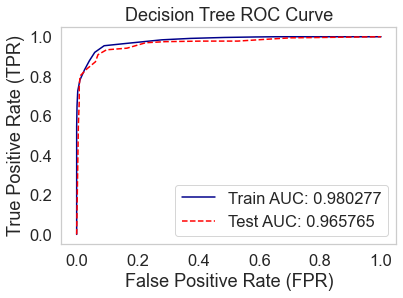

In [20]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
##############train and test score
scores_train = dt.predict_proba(X_train)
scores_test = dt.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
############get a list for taining
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])
###############get a list of scores for testing data
for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
######################roc curve function for training and testing
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)
#########################plot all the data in a graph for ROC curve
plt.plot(fpr_dt_train, tpr_dt_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_dt_test, tpr_dt_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

Result: Decision Tree gives very good performance and generalizes well. But it may be overfitting as AUC is 0.937, so we will try other models.

#### Multinomial Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import MultinomialNB
########################X and y featurs for training 
X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

mnb = MultinomialNB(alpha=0.0009)
##################splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
###############training model for multnomial naive bayes
mnb = mnb.fit(X_train, y_train)
#################prediction for training and testing
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
#############################Accuracy prinitng
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.72646
Test Accuracy: 0.71528


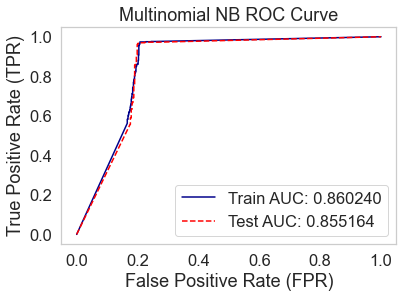

In [22]:
sns.set_style("whitegrid", {'axes.grid' : False})
##########scores for multinomial naive bayes
scores_train = mnb.predict_proba(X_train)
scores_test = mnb.predict_proba(X_test)
#####################traininf score list
y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])
#################testing score list
for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
######################################using roc curve function for training and testing
fpr_mnb_train, tpr_mnb_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_mnb_test, tpr_mnb_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)
#############plot the overall result for data
plt.plot(fpr_mnb_train, tpr_mnb_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.plot(fpr_mnb_test, tpr_mnb_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Multinomial NB ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

Result: Clearly, Multinomial Niave Bayes peforms poorly and is not a good choice as the Train AUC is just 0.556 and Test is 0.555.

#### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
###########Splitting data between X and Y features
X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]
#########using randome forest model
rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
##############trained the model
rf = rf.fit(X_train, y_train)
#################prediction for training and testing
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
########################sscore printing for training and testing
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.87902
Test Accuracy: 0.86806


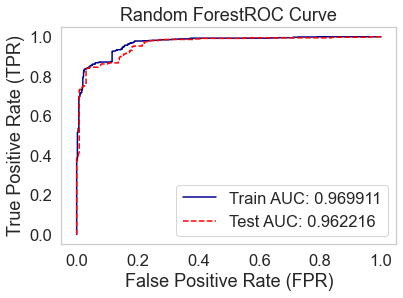

In [24]:
sns.set_style("whitegrid", {'axes.grid' : False})
##########scores for random forest
scores_train = rf.predict_proba(X_train)
scores_test = rf.predict_proba(X_test)
#############scores list for training and testing
y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
##################roc curve function calling
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)
###################printing overall result for random forest
plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random ForestROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

# XG BOOST CLASSIFIER

In [25]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
xg_cl = xgb.XGBClassifier (objective = 'binary:logistic', n_estimators=10, seed=123)
#################prediction for training and testing
xg_cl.fit(X_train, y_train)

y_pred_train = xg_cl.predict(X_train)

y_pred_test = xg_cl.predict(X_test)
################accuracy of models
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

[09:42:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Trainig Accuracy: 0.97378
Test Accuracy: 0.95417


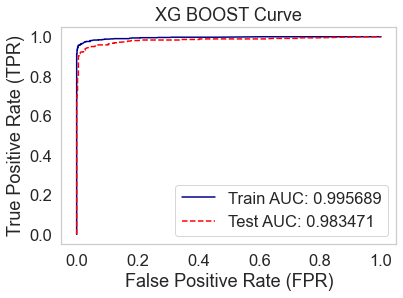

In [26]:
sns.set_style("whitegrid", {'axes.grid' : False})
##########scores for xgb
scores_train = xg_cl.predict_proba(X_train)
scores_test = xg_cl.predict_proba(X_test)
#####################training score list
y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])
#################testing score list
for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
######################################using roc curve function for training and testing
fpr_xg_train, tpr_xg_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_xg_test, tpr_xg_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)
#############plot the overall result for data
plt.plot(fpr_xg_train, tpr_xg_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_xg_train, tpr_xg_train))
plt.plot(fpr_xg_test, tpr_xg_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_xg_test, tpr_xg_test))
plt.title("XG BOOST Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')


### ROC Comparison

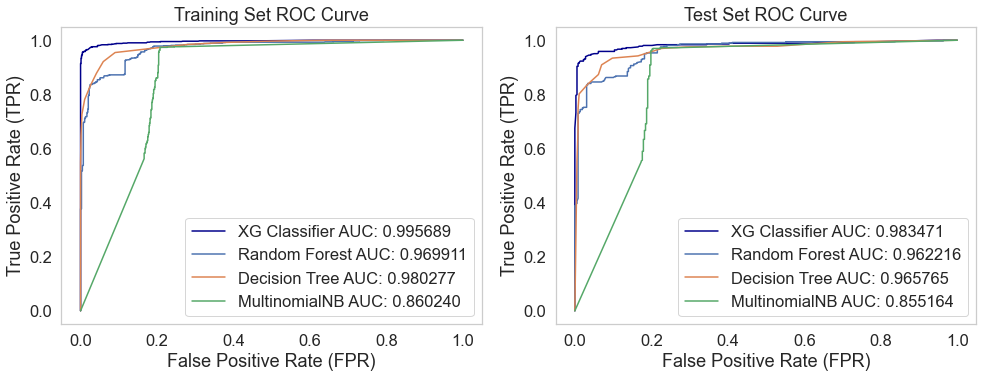

In [27]:
plt.figure(figsize=(14,10))

#Train ROC
plt.subplot(2,2,1)
plt.plot(fpr_xg_train, tpr_xg_train, label='XG Classifier AUC: %5f' % metrics.auc(fpr_xg_train,tpr_xg_train), color='darkblue')
plt.plot(fpr_rf_train, tpr_rf_train, label='Random Forest AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_dt_train, tpr_dt_train, label='Decision Tree AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_mnb_train, tpr_mnb_train, label='MultinomialNB AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.title("Training Set ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

#Test ROC
plt.subplot(2,2,2)
plt.plot(fpr_xg_test,tpr_xg_test, label='XG Classifier AUC: %5f' %metrics.auc(fpr_xg_test,tpr_xg_test), color='darkblue')
plt.plot(fpr_rf_test, tpr_rf_test, label='Random Forest AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.plot(fpr_dt_test, tpr_dt_test, label='Decision Tree AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.plot(fpr_mnb_test, tpr_mnb_test, label='MultinomialNB AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Test Set ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')
plt.tight_layout()

### Thank you.